# ML FILE 1 

#Data exploration - preprocessing

- Most of observations in UK, so making new variable named New Country, have 2 values: UK or other.
- There are 2 numeric data is Quantity and Price. However, data is so extreme in min and max. The reason is that they use 2 columns to report the refund, adjust financial reports, promotion.
- In null data in description and customerID, price <= 0 , there are  2928 observations. In these observations, quantity is too big or <0. In means that this is perhaps is refund or a kind to manage stock, so I maek  new columns named Stock, in here the observation in these conditions and OTHER 
- Price <0 have 3 observations, and they are adjust debt. That's a kind of financial report.
- price = 0 is promotion or amendent.... We can drop price = 0 when clasify description. I correct a lot mispell error in description.
- Price >=300 only have in Description FLAG OF ST GEORGE CAR FLAG so I remove this outliers.

> Indented block


- Quantity <0 is refund, there is no quantity = 0
- Null data only have in description (0.5%), and customer ID (20%). After we remove outliers in price and quantity, there are no more null value in dataset . We remove 10% outliers

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# # For first time use, mounting data from drive
# # Need sign-in authentication
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing Excel from ECS171 Shared Google Drive
# Takes a while for file to load

df = pd.read_excel('drive/Shared drives/ECS171/Dataset/online_retail_II.xlsx')
#df = pd.read_excel('online_retail_II.xlsx')

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## General analysis for all figures

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df['Customer ID'] = df['Customer ID'].astype('object')

In [9]:
df.describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


In quantity and price, min max is so extreme.

In [10]:
df.select_dtypes(include="object").describe()

,Invoice,StockCode,Description,Customer ID,Country
count,525461,525461,522533,417534.0,525461
unique,28816,4632,4681,4383.0,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14911.0,United Kingdom
freq,675,3516,3549,5710.0,485852


In [11]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [12]:
# Number of null Descriptions / Number of records * 100%
2928*100/525461

0.5572249891048051

It appears that 0.557% of the data is missing a Description (we don't know what was purchased).

In [13]:
# Number of null Customer ID / Number of records * 100%
107927*100/525461

20.539488182757616

It appears that 20.539% of the data is missing a Customer ID (we don't know who made the purchase). When we check where the customer ID missing, the quantity is so large and price = 0). 

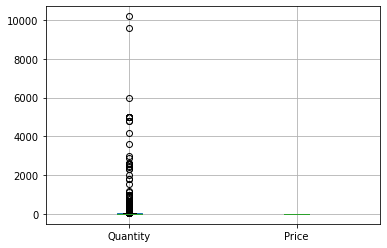

In [14]:
#nullVar = df.loc[(df['Description'].isnull()) & (df['Customer ID'].isnull()) & (df['Price']<= 0.0)
# Question: is this comment above needed? 
quantityLarge = df.loc[(df['Quantity'] > 0) & (df['Price']==0)]
quantityLarge.boxplot()

## Analysis every figures
###Price
- We just have 3 observations with price < 0. That is when adjust bad debt. This is a kind of financila report. 

In [15]:
df.loc[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


`We just have 3 observations with price < 0. That is when adjust bad debt. This is a kind of financial report.
When price <0 , description is "adjust bad debt" , after check only price <0 have description is "adjust bad debt". Invoice begin with letter A `

In [16]:
df.loc[df['Description'] == "Adjust bad debt"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [17]:
df.loc[df['Invoice'] == "^A"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [18]:
#fixing data errors
df.replace('damages','damaged',inplace=True)
df.replace('Damages','damaged',inplace=True)
df.replace('crushed','damaged',inplace=True)
df.replace('smashed','damaged',inplace=True)
df.replace('Damaged','damaged',inplace=True)
df.replace('discoloured','damaged',inplace=True)
df.replace('damages, lost bits etc','damaged',inplace=True)
df.replace('check','checked',inplace=True)
df.replace('missing (wrongly coded?)','missing',inplace=True)
df.replace('No Stock','missing',inplace=True)
df.replace('MISSING','missing',inplace=True)
df.replace('temp','?',inplace=True)
df.replace('Mailout','mailout',inplace=True)
df.replace('found','amendment',inplace=True)
df.replace('Found','amendment',inplace=True)
df.replace('wrong invc','amendment',inplace=True)
df.replace('found again','amendment',inplace=True)
df.replace('update','amendment',inplace=True)
df.replace('counted','amendment',inplace=True)
df.replace('Rust fixed','amendment',inplace=True)
df.replace('This is a test product.','amendment',inplace=True)
df.replace(' Bank Charges','Bank Charges',inplace=True)


damaged                                97
?                                      49
missing                                30
amendment                              16
checked                                11
OWL DOORSTOP                            8
POLYESTER FILLER PAD 45x45cm            7
PICNIC BASKET WICKER LARGE              7
dotcom                                  6
HEART OF WICKER SMALL                   6
FLAG OF ST GEORGE CAR FLAG              6
given away                              6
AIRLINE BAG VINTAGE WORLD CHAMPION      6
IVORY KITCHEN SCALES                    5
ENAMEL FIRE BUCKET CREAM                5
mailout                                 5
WATERING CAN BLUE ELEPHANT              5
ENAMEL WASH BOWL CREAM                  5
PICNIC BASKET WICKER SMALL              5
SMALL POPCORN HOLDER                    5
POLYESTER FILLER PAD 40x40cm            5
ROUND SNACK BOXES SET OF 4 SKULLS       4
HANGING METAL STAR LANTERN              4
DOOR MAT UNION JACK GUNS AND ROSES

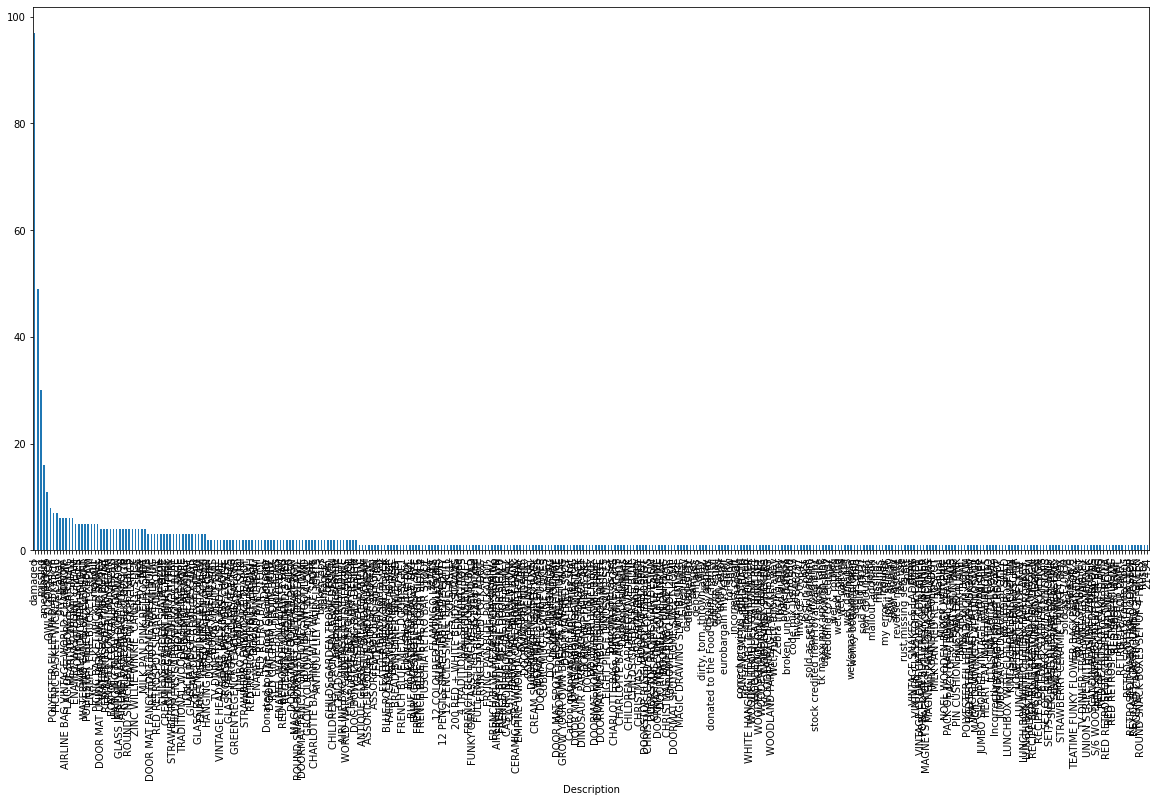

In [19]:
price0 = df.loc[(df["Price"] == 0)]
price0.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
price0['Description'].value_counts().iloc[:50]

In [20]:
dfNew = df.loc[df['Price']>0]
dfNew.describe()


,Quantity,Price,Customer ID
count,521771.000000,521771.000000,417503.000000
mean,10.768153,4.983703,15360.731300
std,90.821824,96.832587,1680.779044
min,-9360.000000,0.001000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


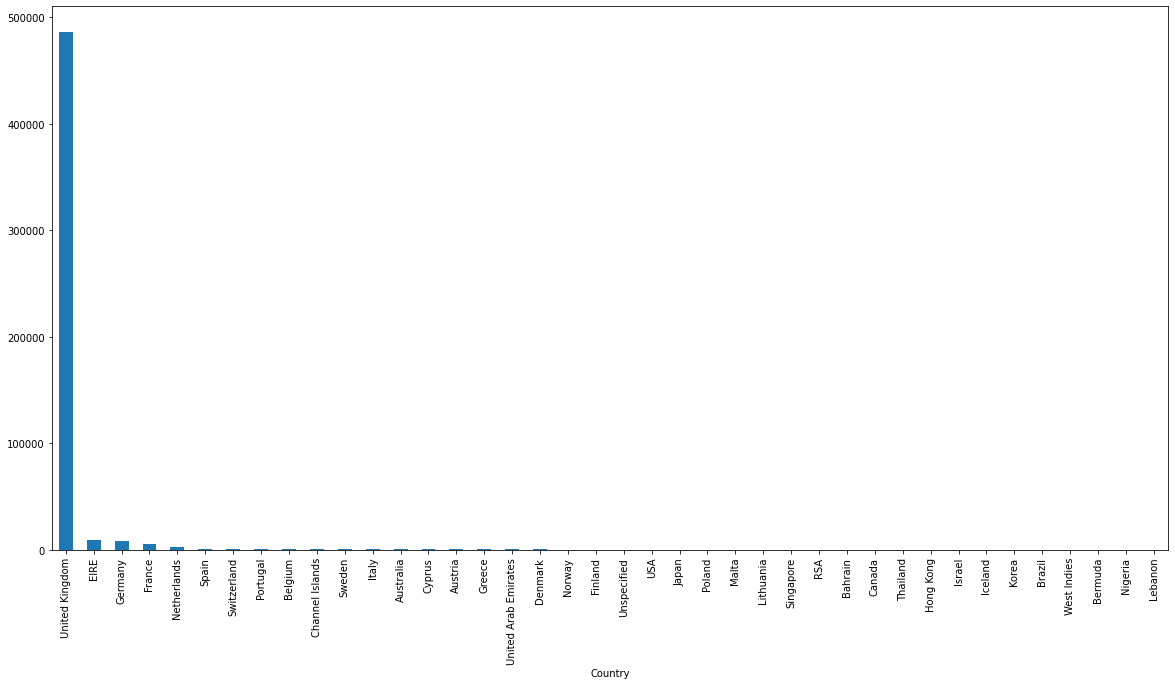

In [21]:
df.groupby('Country')['Country'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

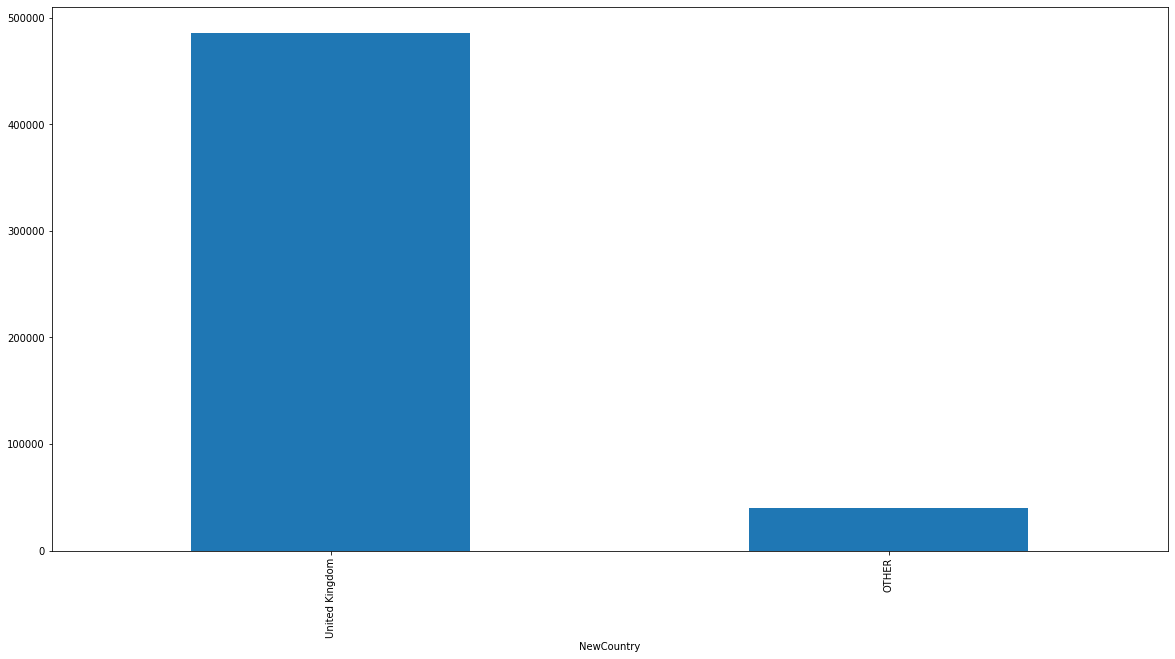

In [22]:
df['NewCountry'] = df.loc[:,'Country']
df.loc[~df['NewCountry'].isin(['United Kingdom']),'NewCountry'] = 'OTHER'
df.groupby('NewCountry')['NewCountry'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [23]:
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)&(df['Quantity'] > 0)]
dfNew.describe()

,Quantity,Price,Customer ID
count,473379.000000,473379.000000,370929.000000
mean,9.972675,4.197500,15565.454823
std,60.038520,63.608037,1593.169081
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14215.000000
50%,3.000000,2.100000,15601.000000
75%,10.000000,4.210000,16941.000000
max,10000.000000,25111.090000,18287.000000


With the price > 50, some of them are Dotcom, Manual. they still use price columns to report financial

DOTCOM POSTAGE                         513
Manual                                 386
VINTAGE POST OFFICE CABINET             52
SET/4 WHITE RETRO STORAGE CUBES         38
POSTAGE                                 29
Bank Charges                            27
Discount                                25
VINTAGE BLUE KITCHEN CABINET            23
Adjustment by john on 26/01/2010 16     19
SAMPLES                                 18
VINTAGE RED KITCHEN CABINET             18
FRENCH STYLE WALL DRESSER               14
Adjustment by john on 26/01/2010 17     11
BLUE KASHMIRI OCCASIONAL TABLE           9
AMAZON FEE                               8
FLAG OF ST GEORGE CAR FLAG               7
REGENCY MIRROR WITH SHUTTERS             6
RUSTIC  SEVENTEEN DRAWER SIDEBOARD       6
GIANT SEVENTEEN DRAWER SIDEBOARD         6
CHEST NATURAL WOOD 20 DRAWERS            5
CHALKBOARD KITCHEN ORGANISER             5
DECORATIVE HANGING SHELVING UNIT         5
ANT WHITE SWEETHEART TABLE W 3 DRAW      4
SCHOOL DESK

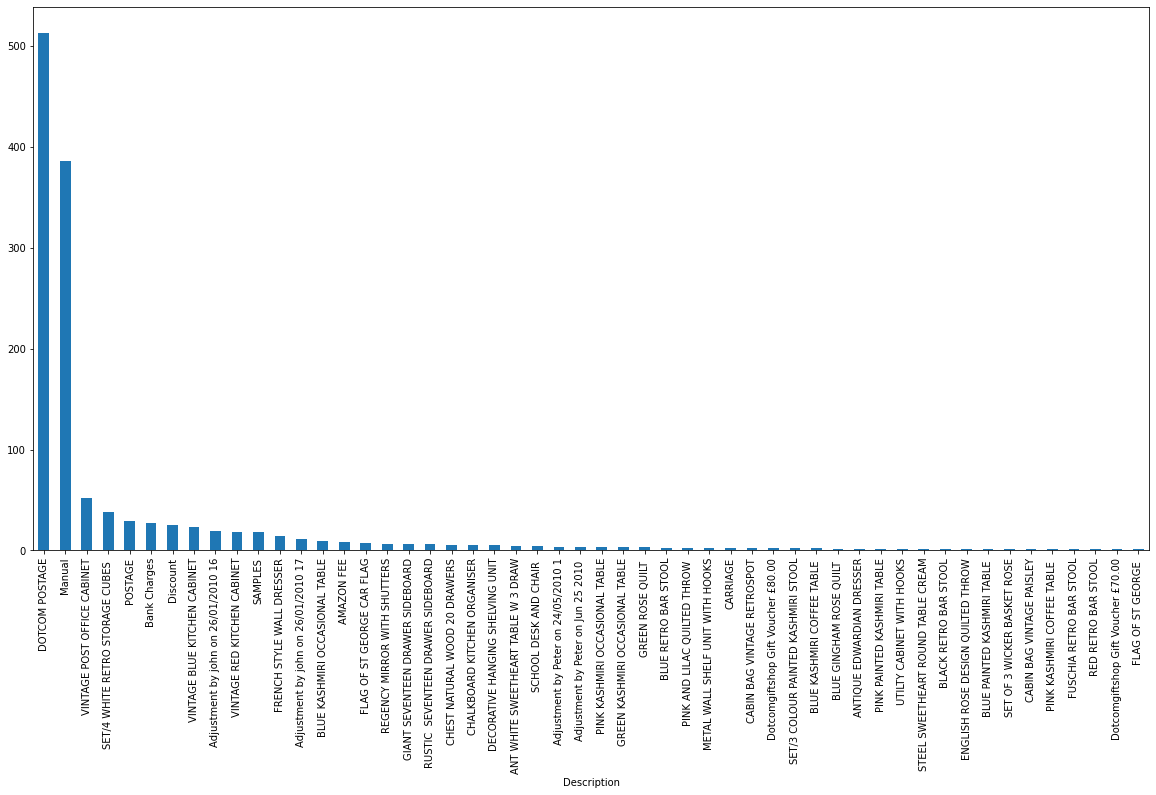

In [24]:
df.loc[df['Price']>50].groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
df.loc[df['Price']>50]['Description'].value_counts().iloc[:50]

In [25]:
# Change values in Finance
df['Finance'] = df.loc[:,'Description']
df['Finance'].replace('Adjustment by john on 26/01/2010 17','Adjust',inplace=True)
df['Finance'].replace('Adjustment by john on 26/01/2010 16','Adjust',inplace=True)
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)  
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)
df['Finance'].replace('DOTCOM POSTAGE','Partner',inplace=True)
df['Finance'].replace('POSTAGE','Partner',inplace=True)
df['Finance'].replace('ebay sales','Partner',inplace=True)
df['Finance'].replace('AMAZON FEE','Partner',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £70.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £80.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £30.00','Discount',inplace=True)
df['Finance'].replace('POSTAGE','Discount',inplace=True)
df['Finance'].replace('SAMPLES','Discount',inplace=True)


In [26]:
df.loc[~df['Finance'].isin(['Adjust','Partner','Discount','Manual']),'Finance'] = 'OTHER'


OTHER       522772
Partner       1610
Manual         854
Discount       161
Adjust          64
Name: Finance, dtype: int64

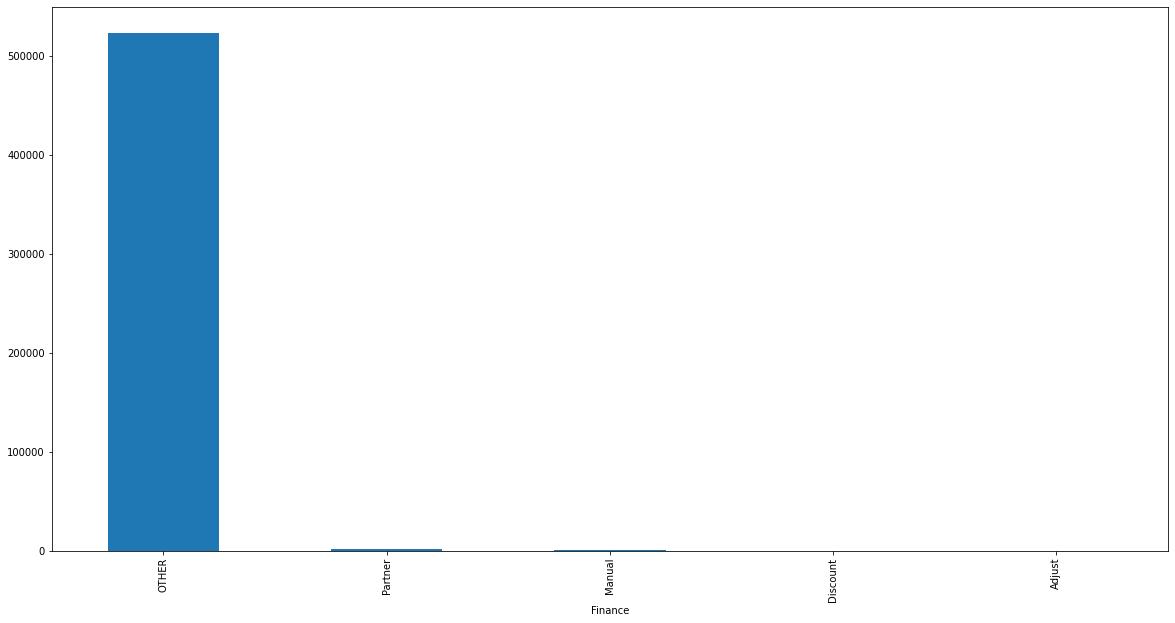

In [27]:
df.groupby('Finance')['Finance'].count().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
df['Finance'].value_counts().iloc[:20]

In [28]:
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)&(df['Quantity'] > 0) & (df['Finance'] == 'OTHER')]
dfNew.describe()

,Quantity,Price,Customer ID
count,472078.000000,472078.000000,370531.000000
mean,9.992016,3.459794,15565.451873
std,60.117730,5.229847,1593.090301
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14215.000000
50%,3.000000,2.100000,15601.000000
75%,10.000000,4.210000,16940.000000
max,10000.000000,1157.150000,18287.000000


In [29]:
dfTemp = dfNew.loc[(dfNew['Price'] >= 300)]

In [30]:
dfTemp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NewCountry,Finance
136403,502451,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-03-24 14:14:00,867.79,NaN,United Kingdom,United Kingdom,OTHER
180997,506571,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-04-30 13:04:00,408.40,NaN,United Kingdom,United Kingdom,OTHER
192196,507637,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-05-10 14:55:00,1157.15,NaN,United Kingdom,United Kingdom,OTHER
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom,United Kingdom,OTHER
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom,United Kingdom,OTHER


In [31]:
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)& (df['Price']<= 300)&(df['Quantity'] > 0) & (df['Finance'] == 'OTHER')]
dfNew.describe()

,Quantity,Price,Customer ID
count,472073.000000,472073.000000,370529.000000
mean,9.992111,3.453281,15565.443013
std,60.118041,4.706247,1593.089994
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14215.000000
50%,3.000000,2.100000,15601.000000
75%,10.000000,4.210000,16940.000000
max,10000.000000,295.000000,18287.000000


REX CASH+CARRY JUMBO SHOPPER           1215
60 TEATIME FAIRY CAKE CASES            1090
PACK OF 72 RETRO SPOT CAKE CASES       1050
PACK OF 60 PINK PAISLEY CAKE CASES      867
VINTAGE SNAP CARDS                      787
SET/20 RED SPOTTY PAPER NAPKINS         728
HANGING HEART ZINC T-LIGHT HOLDER       714
72 SWEETHEART FAIRY CAKE CASES          688
SMALL POPCORN HOLDER                    648
PACK OF 72 SKULL CAKE CASES             647
COLOUR GLASS T-LIGHT HOLDER HANGING     583
PACK OF 60 DINOSAUR CAKE CASES          573
BATHROOM METAL SIGN                     559
BOX OF 24 COCKTAIL PARASOLS             528
PACK OF 12 HEARTS DESIGN TISSUES        510
HANGING JAM JAR T-LIGHT HOLDER          496
WORLD WAR 2 GLIDERS ASSTD DESIGNS       479
SINGLE HEART ZINC T-LIGHT HOLDER        479
RED SPOTTY CHARLOTTE BAG                477
PACK 20 ENGLISH ROSE PAPER NAPKINS      476
STRAWBERRY CHARLOTTE BAG                467
ASSTD DESIGN BUBBLE GUM RING            461
SPACEBOY BIRTHDAY CARD          

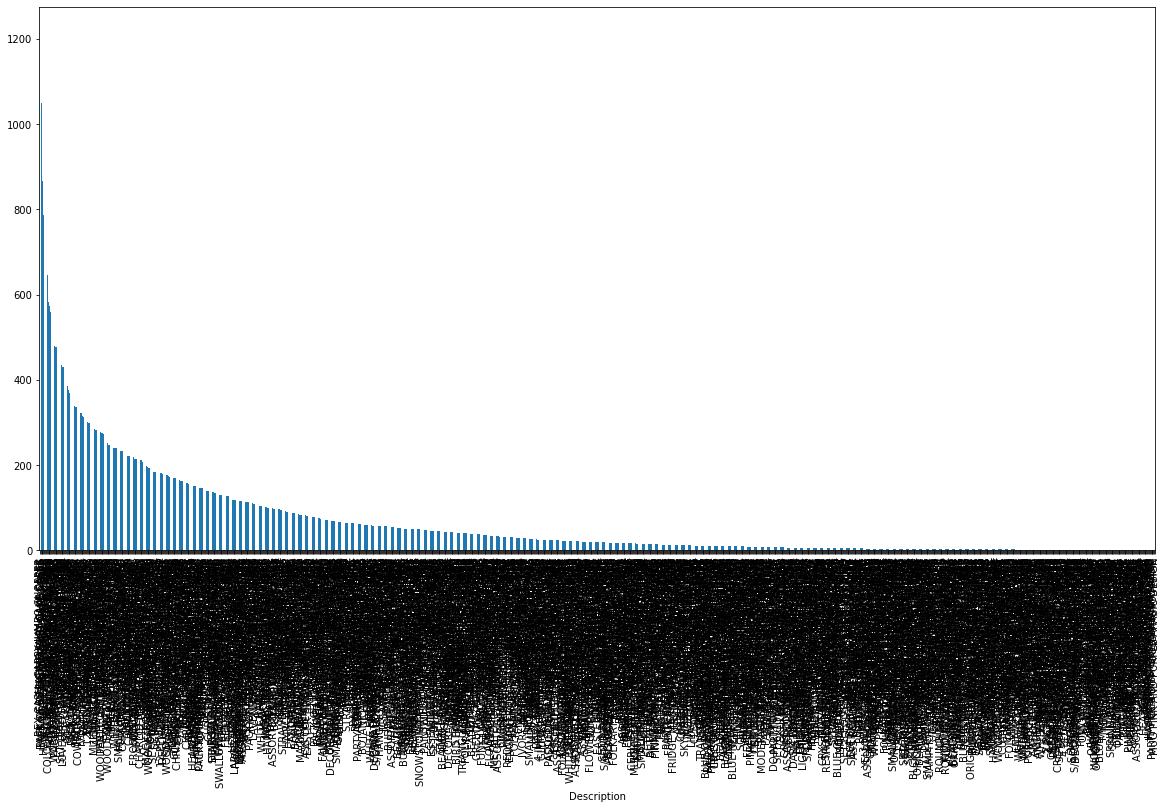

In [32]:
dfTemp = dfNew.loc[df['Price'] < 1   ]
dfTemp.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfTemp['Description'].value_counts().iloc[:50]

In [33]:
dfTemp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NewCountry,Finance
33,489437,22130,PARTY CONE CHRISTMAS DECORATION,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom,United Kingdom,OTHER
41,489437,10002,INFLATABLE POLITICAL GLOBE,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom,United Kingdom,OTHER
44,489437,21987,PACK OF 6 SKULL PAPER CUPS,12,2009-12-01 09:08:00,0.65,15362.0,United Kingdom,United Kingdom,OTHER
45,489437,21989,PACK OF 20 SKULL PAPER NAPKINS,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom,United Kingdom,OTHER
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom,United Kingdom,OTHER
...,...,...,...,...,...,...,...,...,...,...
525424,538171,21882,SKULLS TAPE,5,2010-12-09 20:01:00,0.65,17530.0,United Kingdom,United Kingdom,OTHER
525425,538171,21879,HEARTS GIFT TAPE,5,2010-12-09 20:01:00,0.65,17530.0,United Kingdom,United Kingdom,OTHER
525429,538171,21034,REX CASH+CARRY JUMBO SHOPPER,1,2010-12-09 20:01:00,0.95,17530.0,United Kingdom,United Kingdom,OTHER
525440,538171,21989,PACK OF 20 SKULL PAPER NAPKINS,2,2010-12-09 20:01:00,0.85,17530.0,United Kingdom,United Kingdom,OTHER




### Analyze StockCode


In [34]:
dfNew.select_dtypes(include="object").describe()

,Invoice,StockCode,Description,Country,NewCountry,Finance
count,472073,472073,472073,472073,472073,472073
unique,19083,4230,4498,1,1,1
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,United Kingdom,OTHER
freq,674,3308,3342,472073,472073,472073


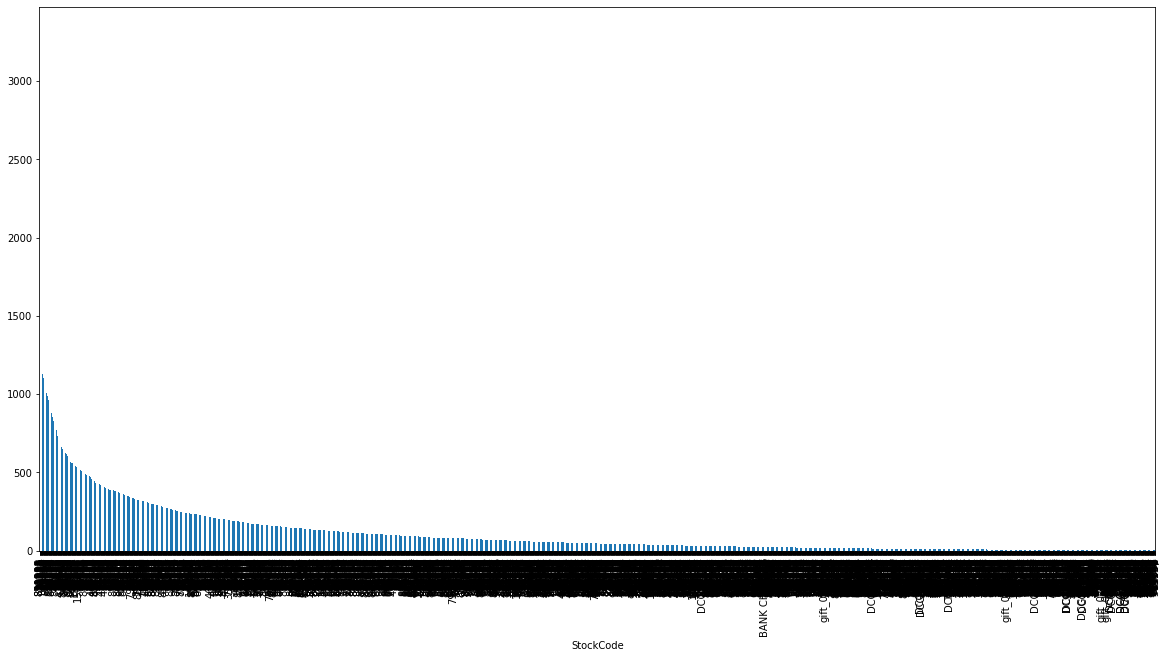

In [35]:
dfNew.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [36]:
dfNew.groupby('Description')['Description'].count().sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3342
REGENCY CAKESTAND 3 TIER              1864
STRAWBERRY CERAMIC TRINKET BOX        1615
ASSORTED COLOUR BIRD ORNAMENT         1373
HOME BUILDING BLOCK WORD              1338
                                      ... 
SCOTTIE DOGS CHILDRENS OVERALL           1
CARDHOLDER GINGHAM HEART                 1
ETCHED GLASS HEART TREE DECORATION       1
DOOR MAT BLUE FLOCK                      1
BAKING MOULD EASTER EGG MILK CHOC        1
Name: Description, Length: 4498, dtype: int64

In [37]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472073 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      472073 non-null  object        
 1   StockCode    472073 non-null  object        
 2   Description  472073 non-null  object        
 3   Quantity     472073 non-null  int64         
 4   InvoiceDate  472073 non-null  datetime64[ns]
 5   Price        472073 non-null  float64       
 6   Customer ID  370529 non-null  float64       
 7   Country      472073 non-null  object        
 8   NewCountry   472073 non-null  object        
 9   Finance      472073 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 39.6+ MB


In [38]:
(525461 - 472073)/525461


0.10160221215275729

# Data after remove outliers
# After EDA?? Start of preprocessing 

In [39]:
# import pandas as pd
# import numpy as np
# # For first time use, mounting data from drive
# # Need sign-in authentication
# from google.colab import drive
# drive.mount('/content/drive')
# Importing Excel from ECS171 Shared Google Drive
# Takes a while for file to load
df = pd.read_excel('drive/Shared drives/ECS171/Dataset/online_retail_II.xlsx')

In [40]:

df['Customer ID'] = df['Customer ID'].astype('object')
#replace mispell
df.replace('damages','damaged',inplace=True)
df.replace('Damages','damaged',inplace=True)
df.replace('crushed','damaged',inplace=True)
df.replace('smashed','damaged',inplace=True)
df.replace('Damaged','damaged',inplace=True)
df.replace('discoloured','damaged',inplace=True)
df.replace('damages, lost bits etc','damaged',inplace=True)
df.replace('check','checked',inplace=True)
df.replace('missing (wrongly coded?)','missing',inplace=True)
df.replace('No Stock','missing',inplace=True)
df.replace('MISSING','missing',inplace=True)
df.replace('temp','?',inplace=True)
df.replace('Mailout','mailout',inplace=True)
df.replace('found','amendment',inplace=True)
df.replace('Found','amendment',inplace=True)
df.replace('wrong invc','amendment',inplace=True)
df.replace('found again','amendment',inplace=True)
df.replace('update','amendment',inplace=True)
df.replace('counted','amendment',inplace=True)
df.replace('Rust fixed','amendment',inplace=True)
df.replace('This is a test product.','amendment',inplace=True)
df.replace(' Bank Charges','Bank Charges',inplace=True)

df['NewCountry'] = df.loc[:,'Country']
df.loc[~df['NewCountry'].isin(['United Kingdom']),'NewCountry'] = 'OTHER'

# Change values in Finance
df['Finance'] = df.loc[:,'Description']
df['Finance'].replace('Adjustment by john on 26/01/2010 17','Adjust',inplace=True)
df['Finance'].replace('Adjustment by john on 26/01/2010 16','Adjust',inplace=True)
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)  
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)
df['Finance'].replace('DOTCOM POSTAGE','Partner',inplace=True)
df['Finance'].replace('POSTAGE','Partner',inplace=True)
df['Finance'].replace('ebay sales','Partner',inplace=True)
df['Finance'].replace('AMAZON FEE','Partner',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £70.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £80.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £30.00','Discount',inplace=True)
df['Finance'].replace('POSTAGE','Discount',inplace=True)
df['Finance'].replace('SAMPLES','Discount',inplace=True)

# Change value in Finance to make other
df.loc[~df['Finance'].isin(['Adjust','Partner','Discount','Manual']),'Finance'] = 'OTHER'

# Make New dataset after cleaning and remove 
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)& (df['Price']<= 300)&(df['Quantity'] > 0) & (df['Finance'] == 'OTHER')]
dfNew['Customer ID'] = dfNew['Customer ID'].astype('object')
dfNew.info()
dfNew.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 472073 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      472073 non-null  object        
 1   StockCode    472073 non-null  object        
 2   Description  472073 non-null  object        
 3   Quantity     472073 non-null  int64         
 4   InvoiceDate  472073 non-null  datetime64[ns]
 5   Price        472073 non-null  float64       
 6   Customer ID  370529 non-null  object        
 7   Country      472073 non-null  object        
 8   NewCountry   472073 non-null  object        
 9   Finance      472073 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 39.6+ MB


,Quantity,Price
count,472073.000000,472073.000000
mean,9.992111,3.453281
std,60.118041,4.706247
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,10000.000000,295.000000


In [41]:
del dfNew['NewCountry']
del dfNew['Country']
del dfNew['Finance']

In [42]:
dfNew.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085


In [43]:
dfNew.select_dtypes(include="object").describe()

,Invoice,StockCode,Description,Customer ID
count,472073,472073,472073,370529.0
unique,19083,4230,4498,3953.0
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0
freq,674,3308,3342,5042.0


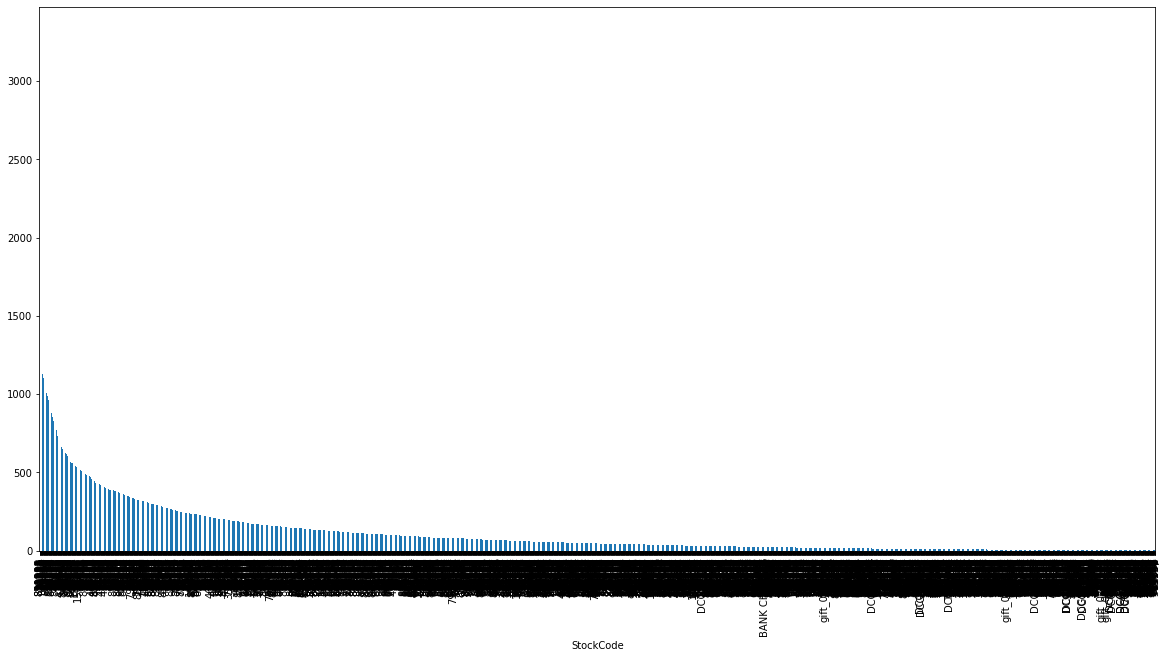

In [44]:
dfNew.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [45]:
#Top 20 stockCode
dfNew['StockCode'].value_counts().iloc[:20]

85123A    3308
85099B    1885
22423     1864
21212     1696
21232     1615
20725     1449
84879     1373
21754     1338
84991     1273
21034     1215
21931     1153
22470     1129
20727     1111
21755     1110
82494L    1110
20914     1105
21080     1094
22383     1094
21977     1079
21733     1049
Name: StockCode, dtype: int64

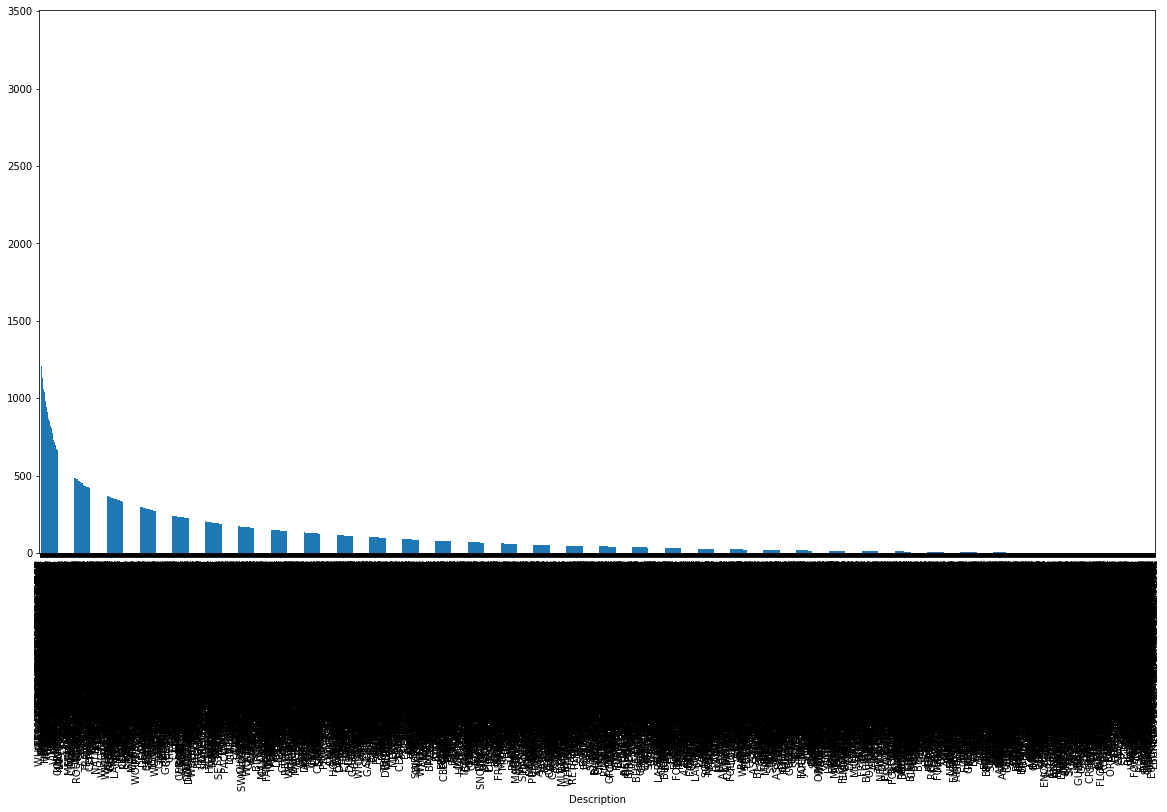

In [46]:
dfNew.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [47]:
#Top 20 Description
dfNew['Description'].value_counts().iloc[:20]

WHITE HANGING HEART T-LIGHT HOLDER    3342
REGENCY CAKESTAND 3 TIER              1864
STRAWBERRY CERAMIC TRINKET BOX        1615
ASSORTED COLOUR BIRD ORNAMENT         1373
HOME BUILDING BLOCK WORD              1338
PACK OF 72 RETRO SPOT CAKE CASES      1286
60 TEATIME FAIRY CAKE CASES           1273
REX CASH+CARRY JUMBO SHOPPER          1215
JUMBO BAG RED RETROSPOT               1206
JUMBO STORAGE BAG SUKI                1153
WOODEN FRAME ANTIQUE WHITE            1137
LUNCH BAG RED SPOTTY                  1132
HEART OF WICKER LARGE                 1129
LUNCH BAG  BLACK SKULL.               1111
LOVE BUILDING BLOCK WORD              1110
PACK OF 60 PINK PAISLEY CAKE CASES    1079
LUNCH BAG SUKI  DESIGN                1061
HEART OF WICKER SMALL                 1049
RED HANGING HEART T-LIGHT HOLDER      1049
JUMBO BAG STRAWBERRY                  1040
Name: Description, dtype: int64

BROCADE RING PURSE                     2
PACK OF 12 RED SPOTTY TISSUES          1
ROTATING SILVER ANGELS T-LIGHT HLDR    1
POP ART PEN CASE & PENS                1
PACK OF 12 PINK PAISLEY TISSUES        1
SET/6 FRUIT SALAD PAPER CUPS           1
PACK OF 12 SKULL TISSUES               1
PACK OF 12 SUKI TISSUES                1
SET/6 FRUIT SALAD  PAPER PLATES        1
PACK OF 12 WOODLAND TISSUES            1
Name: Description, dtype: int64

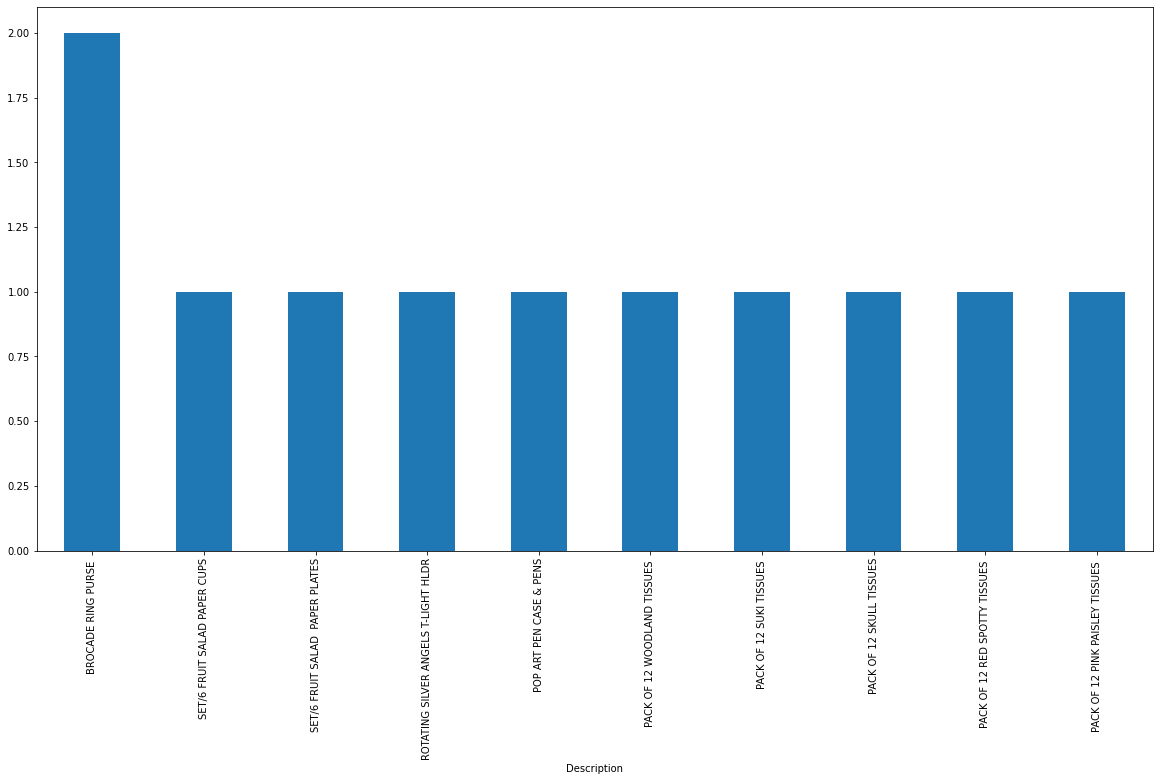

In [48]:
# Quantity > 5000
dfTempPrice = dfNew.loc[dfNew['Quantity'] >5000   ]
dfTempPrice.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfTempPrice['Description'].value_counts().iloc[:10]

In [49]:
dfTempPrice

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
7303,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940
326847,521315,17003,BROCADE RING PURSE,7128,2010-09-03 12:01:00,0.19,15838
358763,524174,21096,SET/6 FRUIT SALAD PAPER PLATES,7008,2010-09-27 16:30:00,0.13,13687
358764,524174,21088,SET/6 FRUIT SALAD PAPER CUPS,7128,2010-09-27 16:30:00,0.08,13687
358774,524174,16047,POP ART PEN CASE & PENS,5184,2010-09-27 16:30:00,0.08,13687
432176,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04 11:36:00,1.69,15838


VINTAGE BLUE KITCHEN CABINET    16
VINTAGE RED KITCHEN CABINET     16
FLAG OF ST GEORGE CAR FLAG       2
Name: Description, dtype: int64

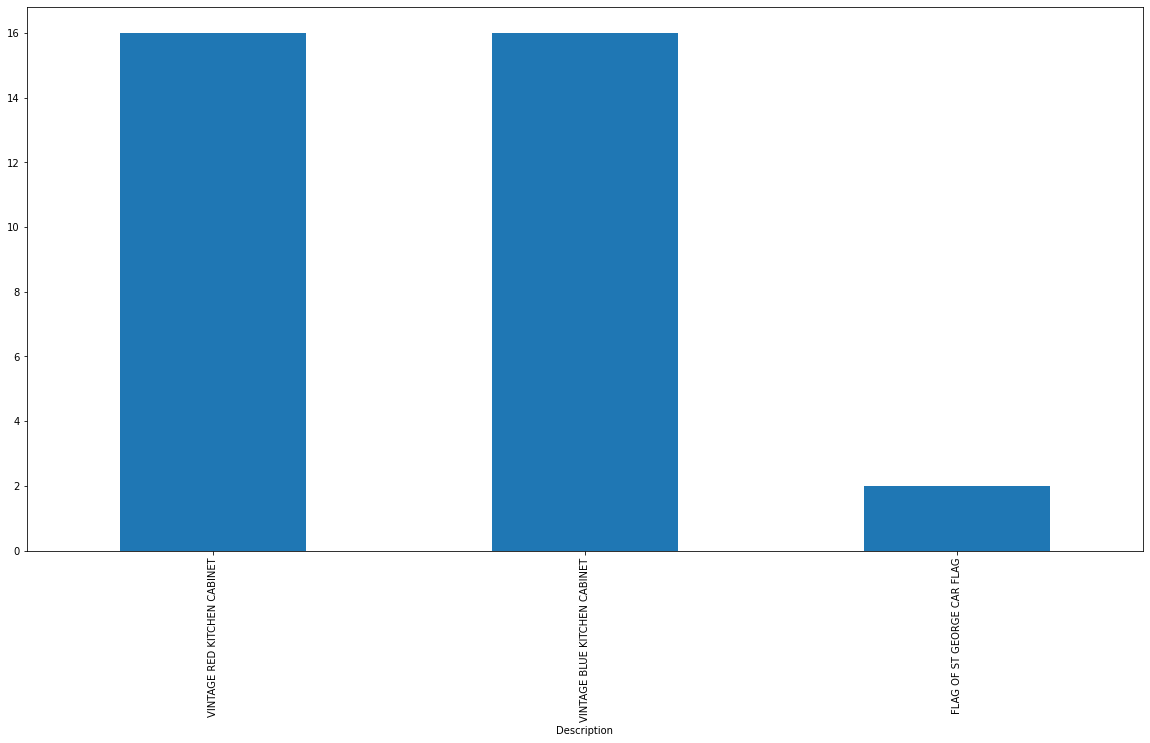

In [50]:
# 300 > Price > 200
dfTempPrice = dfNew.loc[dfNew['Price'] >200   ]
dfTempPrice.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfTempPrice['Description'].value_counts().iloc[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


17841.0    5042
14606.0    3861
12748.0    2614
17850.0    2499
16549.0    2269
15311.0    2052
14527.0    1726
16782.0    1693
13089.0    1544
17377.0    1357
Name: Customer ID, dtype: int64

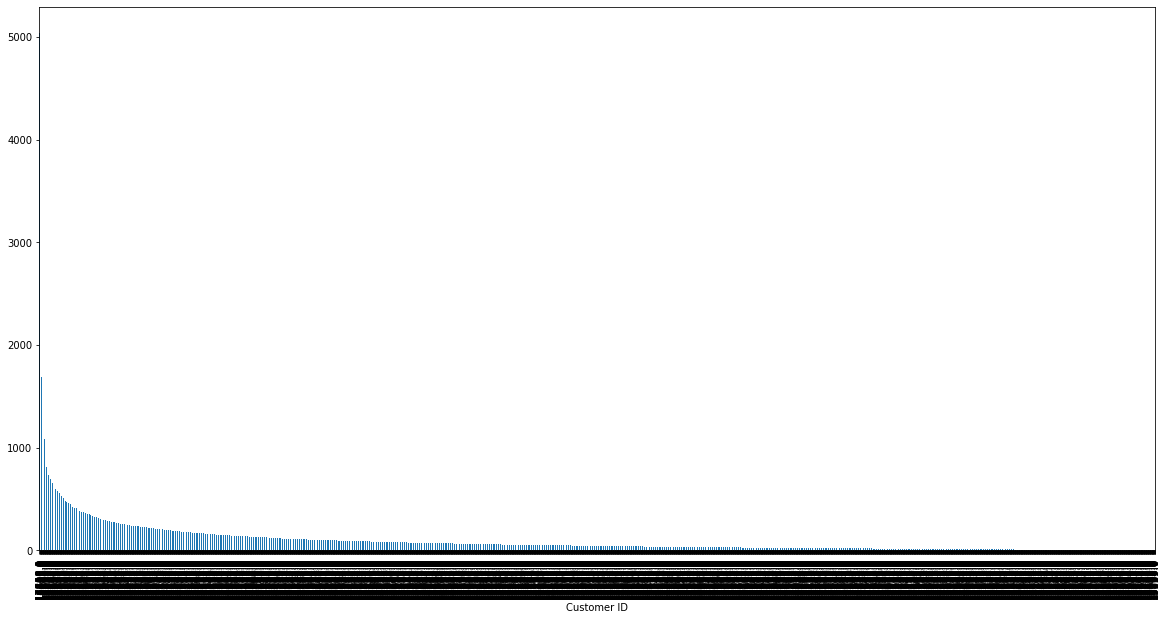

In [51]:
# Quantity > 5000
#dfTempPrice = dfNew.loc[dfNew['Customer ID'] >5000   ]
dfNew['Customer ID'] = dfNew['Customer ID'].astype('object')
dfNew.groupby('Customer ID')['Customer ID'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfNew['Customer ID'].value_counts().iloc[:10]

In [52]:
# dfNew.loc[df['Customer ID' == '17841']]

#  START OF ML CODE 
Step 1): Find RFM scores 
- Recency: How recently a customer has made a purchase
- Frequency: How often a customer makes a purchase
- Monetary Value: How much money a customer spends on purchases

In [53]:
dfNew.head()
dfNew.info()
# Numerical features: Quantity, Price, Customer ID 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472073 entries, 0 to 525460
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      472073 non-null  object        
 1   StockCode    472073 non-null  object        
 2   Description  472073 non-null  object        
 3   Quantity     472073 non-null  int64         
 4   InvoiceDate  472073 non-null  datetime64[ns]
 5   Price        472073 non-null  float64       
 6   Customer ID  370529 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.8+ MB


In [54]:
# To retrive recency, we need to remove the time stamp from the InvoiceDate function 
# extract year, month and day
import datetime as dt
# this remove the time from the invoice, is that needed? 
dfNew['InvoiceDateNoTime'] = dfNew.InvoiceDate.apply(lambda x: dt.datetime(x.year, x.month, x.day))
dfNew.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,InvoiceDateNoTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,2009-12-01


In [55]:
# This dataset is from 2009 to 2011, so we can't use todays date to compare our purchases. 
# We will use the latest date there is in the Invoice
latest = max(dfNew['InvoiceDateNoTime'])
# dfNew['recency'] = latest - dfNew['InvoiceDateNoTime']


In [56]:
# dfNew.head()

### Recency done, now doing Frequency and Monetary
Monetary is the sum of how much was spent, which is the Price * Quantity 
Frequency is the number of transactions, which is InvoiceNo

In [57]:
# Create total spend dataframe
dfNew['total_money'] = dfNew.Quantity * dfNew.Price 
# dfNew['frequency'] = dfNew
dfNew.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,InvoiceDateNoTime,total_money
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,2009-12-01,30.0


In [58]:
rfm = dfNew.groupby('Customer ID').agg({'InvoiceDateNoTime': lambda x: (latest - x.max()).days, 'Invoice': 'count', 'total_money': 'sum'})

rfm['InvoiceDateNoTime'] = rfm['InvoiceDateNoTime'].astype(int)
rfm.rename(columns={'InvoiceDateNoTime': 'recency', 
                         'Invoice': 'frequency', 
                         'total_money': 'monetary'}, inplace=True)

In [59]:
rfm.head()
# rfm.describe()
# There are negative values for recency! 

,recency,frequency,monetary
Customer ID,,,
12346.0,164,33,372.86
12608.0,39,16,415.79
12745.0,121,22,723.85
12746.0,175,17,254.55
12747.0,4,154,5080.53


In [60]:
rfm.loc[12748.0,'monetary']

19876.940000000137

### Going to find the Cumulative Scores and RFM Segmentation
We need RFM quantiles in order to do the cumulative scoring and segmentation
We will have 3 categories of customers: best, mediocre, and poor

In [61]:
#I am creating 3 groups for recency, frequency, and monetary

#first line:r_scale contains all the labels 1,2,3. There is a step of -1 in the range function because the LOWER the score the LESS recent the transaction is.
r_scale = range(4,0,-1)
#create a column that accounts for the r_scale
R_Scale = pd.qcut(rfm["recency"], q = 4, labels = r_scale)

#f_scale contains all the labels 1,2,3
f_scale = range(1,5)
#create a column that accounts for the f_scale
F_Scale = pd.qcut(rfm["frequency"], q = 4, labels = f_scale)

#m_scale contain all the labels 1,2,3
m_scale = range(1,5)
#create a column that accounts for the m_scale
M_Scale = pd.qcut(rfm["monetary"], q = 4, labels = m_scale)

#put all columns in rfm and change Dtype from category to str(we need to do this so .map(str) work in the next few lines)
rfm["R_scale"],rfm["F_scale"], rfm["M_scale"] = R_Scale.values.astype(str),F_Scale.values.astype(str),M_Scale.values.astype(str)

#create rfm segment(concatenated_score) and rfm score(sum_score) column(we need to change 'concatenated_score' into a string to get the sum)
rfm['concatenated_score'] =  rfm["R_scale"].map(str) + rfm["F_scale"].map(str) +rfm["M_scale"].map(str)
rfm['sum_score'] = rfm["R_scale"].astype(int) + rfm["F_scale"].astype(int) +rfm["M_scale"].astype(int)

#label customer as best, mediocre, or poor
customer_labels = ['Poor', "Fair", 'Good', 'Excellent']
customer_quantiles = pd.qcut(rfm['sum_score'], q=4, labels = customer_labels)
rfm['customer_categories'] = customer_quantiles.values

#want to see the results: rfm dataframe
print(rfm.head())
rfm.info()

             recency  frequency  ...  sum_score customer_categories
Customer ID                      ...                               
12346.0          164         33  ...          5                Poor
12608.0           39         16  ...          6                Fair
12745.0          121         22  ...          7                Fair
12746.0          175         17  ...          3                Poor
12747.0            4        154  ...         12           Excellent

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Float64Index: 3953 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   recency              3953 non-null   int64   
 1   frequency            3953 non-null   int64   
 2   monetary             3953 non-null   float64 
 3   R_scale              3953 non-null   object  
 4   F_scale              3953 non-null   object  
 5   M_scale              39

Going to display the statistics of each quantile in terms of rfm['recency'], rfm['frequency'], and rfm['monetary'] respectfully


In [62]:


#1) Recency

#to collect info about customers with a specific customer_categories,I want to get a subset from the rfm dataset for the excellent,good,fair, and poor customers
excellent = rfm[rfm["customer_categories"] =='Excellent']['recency']
good = rfm[rfm["customer_categories"] =='Good']['recency']
fair = rfm[rfm["customer_categories"] =='Fair']['recency']
poor = rfm[rfm["customer_categories"] =='Poor']['recency'] 

#get the median, mean, and max recency value
r_list = [excellent,good,fair,poor]
for elem in r_list:
    print(elem.describe())

count    750.000000
mean      13.238667
std       12.204875
min        0.000000
25%        3.000000
50%       10.000000
75%       19.500000
max       51.000000
Name: recency, dtype: float64
count    1192.000000
mean       46.870805
std        44.680902
min         0.000000
25%        15.000000
50%        35.000000
75%        63.250000
max       315.000000
Name: recency, dtype: float64
count    875.000000
mean      86.778286
std       76.460179
min        0.000000
25%       29.000000
50%       63.000000
75%      119.500000
max      373.000000
Name: recency, dtype: float64
count    1136.000000
mean      187.873239
std       103.031768
min        18.000000
25%        90.000000
50%       189.500000
75%       268.250000
max       373.000000
Name: recency, dtype: float64


In [63]:
#2) Frequency

#to collect info about customers with a specific F_scale, I want to get a subset from the rfm dataframe

#to collect info about customers with a specific customer_categories,I want to get a subset from the rfm dataset for the excellent,good,fair and poor customers
excellent = rfm[rfm["customer_categories"] =='Excellent']['frequency']
good = rfm[rfm["customer_categories"] =='Good']['frequency']
fair = rfm[rfm["customer_categories"] =='Fair']['frequency']
poor = rfm[rfm["customer_categories"] =='Poor']['frequency']

#get the median, mean, and max recency value
f_list = [excellent,good,fair,poor]
for elem in f_list:
    print(elem.describe())

count     750.000000
mean      283.141333
std       341.531716
min        45.000000
25%       129.000000
50%       194.000000
75%       315.000000
max      5042.000000
Name: frequency, dtype: float64
count    1192.000000
mean       92.208893
std        82.404141
min         3.000000
25%        50.000000
50%        72.000000
75%       104.000000
max      1211.000000
Name: frequency, dtype: float64
count    875.000000
mean      34.576000
std       22.273618
min        1.000000
25%       20.000000
50%       31.000000
75%       44.000000
max      164.000000
Name: frequency, dtype: float64
count    1136.000000
mean       15.850352
std        12.231344
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        76.000000
Name: frequency, dtype: float64


In [64]:
#3) Monetary

#to collect info about customers with a specific M_scale, I want to get a subset from the rfm dataframe

#to collect info about customers with a specific customer_categories,I want to get a subset from the rfm dataset for the excellent,good,fair and poor customers
excellent = rfm[rfm["customer_categories"] =='Excellent']['monetary']
good = rfm[rfm["customer_categories"] =='Good']['monetary']
fair = rfm[rfm["customer_categories"] =='Fair']['monetary']
poor = rfm[rfm["customer_categories"] =='Poor']['monetary']

#get the median, mean, and max recency value
m_list = [excellent,good,fair,poor]
for elem in m_list:
    print(elem.describe())

count       750.000000
mean       6106.819181
std       15949.099615
min         689.040000
25%        2050.702500
50%        3002.910000
75%        5197.677500
max      349164.350000
Name: monetary, dtype: float64
count     1192.000000
mean      1590.422823
std       2035.352795
min        107.860000
25%        743.195000
50%       1149.600000
75%       1698.757500
max      40519.920000
Name: monetary, dtype: float64
count      875.000000
mean       681.525383
std       1194.044775
min         10.950000
25%        326.780000
50%        503.640000
75%        740.145000
max      26237.400000
Name: monetary, dtype: float64
count    1136.000000
mean      251.757335
std       165.563710
min         2.950000
25%       135.987500
50%       216.675000
75%       321.487500
max      1437.430000
Name: monetary, dtype: float64


Going to display the statistics of each quantile in terms of rfm['sum_score']

In [65]:


#to collect info about customers with a specific customer_categories,I want to get a subset from the rfm dataset for the excellent,good,fair, and poor customers
excellent = rfm[rfm["customer_categories"] =='Excellent']['sum_score']
good = rfm[rfm["customer_categories"] =='Good']['sum_score']
fair = rfm[rfm["customer_categories"] =='Fair']['sum_score']
poor = rfm[rfm["customer_categories"] =='Poor']['sum_score']

#get the median, mean, and max recency value
s_list = [excellent,good,fair,poor]
for elem in s_list:
    print(elem.describe())

count    750.000000
mean      11.500000
std        0.500334
min       11.000000
25%       11.000000
50%       11.500000
75%       12.000000
max       12.000000
Name: sum_score, dtype: float64
count    1192.000000
mean        8.972315
std         0.808273
min         8.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: sum_score, dtype: float64
count    875.00000
mean       6.50400
std        0.50027
min        6.00000
25%        6.00000
50%        7.00000
75%        7.00000
max        7.00000
Name: sum_score, dtype: float64
count    1136.00000
mean        4.06338
std         0.81799
min         3.00000
25%         3.00000
50%         4.00000
75%         5.00000
max         5.00000
Name: sum_score, dtype: float64


### KMeans Clustering
We want to group similar data points in the RFM quantiles

Source: https://medium.com/@mayureshrpalav/clustering-customers-online-retail-dataset-516e961e7bc

In [66]:
from sklearn.cluster import KMeans

In [67]:
rfm[['R_scale', 'F_scale', 'M_scale']].head()

,R_scale,F_scale,M_scale
Customer ID,,,
12346.0,1,2,2
12608.0,3,1,2
12745.0,2,2,3
12746.0,1,1,1
12747.0,4,4,4


In [68]:
# initialize list of lists 
data = [[1, 2, 2], [3, 1, 2], [2, 2, 3], [1 , 1, 1], [4, 4, 4]] 
  
# Create the pandas DataFrame 
cluster_df = pd.DataFrame(data, columns = ['R_scale', 'F_scale', 'M_scale']) 
  
# print dataframe. 
cluster_df

,R_scale,F_scale,M_scale
0,1,2,2
1,3,1,2
2,2,2,3
3,1,1,1
4,4,4,4


## Find the Best Cluster

Source:


*   https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
*   https://medium.com/@mayureshrpalav/clustering-customers-online-retail-dataset-516e961e7bc 


Methods Tested:


1.   Davies-Bouldin Index
2.   Bayesian information criterion
3.   Silhouette Coefficient
4.   Elbow Method

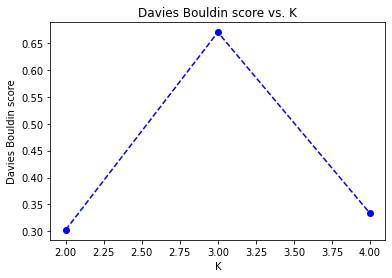

In [69]:
# Davies-Bouldin Index

# Source: https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(cluster_df)
    score = davies_bouldin_score(cluster_df, model)
    
    return score

scores = []
centers = list(range(2,5))
for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

# As DB index falls, the clustering improves.
# This is different from silhouette coefficient and Calinski-Harabasz index.
# 2 and 4 are the lowest.

In [70]:
# Bayesian information criterion

# Source: https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

# The lower the BIC score, better is the model.

from sklearn.mixture import GaussianMixture
n_components = range(2, 5)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(cluster_df)
        score.append((cov,n_comp,gmm.bic(cluster_df)))
score

# 4 is the lowest BIC score, so better

[('spherical', 2, 8.782108328948178),
 ('spherical', 3, -23.22933701472871),
 ('spherical', 4, -57.62088493723736),
 ('tied', 2, 37.421832662166665),
 ('tied', 3, -13.159865624602169),
 ('tied', 4, -66.51415252908589),
 ('diag', 2, 14.231801553962601),
 ('diag', 3, -14.874303287662286),
 ('diag', 4, -69.17102340342777),
 ('full', 2, 11.524259147249662),
 ('full', 3, -41.18670790452374),
 ('full', 4, -75.32990663154443)]

In [71]:
# Silhouette Coefficient

# Source: https://medium.com/@mayureshrpalav/clustering-customers-online-retail-dataset-516e961e7bc

from sklearn.metrics import silhouette_score

# Create elbow graph to visualize best n_cluster value
scores = []

# Test clusters 2 to 6
for i in range(2,7):
  kmeans = KMeans(n_clusters = i, max_iter = 40, verbose = True).fit(rfm[['R_scale', 'F_scale', 'M_scale']])
  scores.append(kmeans.inertia_)

  # Calculate silhouette score
  # Higher score than better cluster
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(rfm[['R_scale', 'F_scale', 'M_scale']], cluster_labels)
  print('For n_cluster ', i, ', the silhouette scores is ', silhouette_avg)

# For n_cluster  2 , the silhouette scores is  0.4569182351354267
# For n_cluster  3 , the silhouette scores is  0.43190732372536494 
# For n_cluster  4 , the silhouette scores is  0.4546583825197727
# For n_cluster  5 , the silhouette scores is  0.4836726343682743
# For n_cluster  6 , the silhouette scores is  0.5114128603523025

# Cluster 6 is best

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7620.251481727073
start iteration
done sorting
end inner loop
Iteration 1, inertia 7244.09595571871
start iteration
done sorting
end inner loop
Iteration 2, inertia 7145.475620758821
start iteration
done sorting
end inner loop
Iteration 3, inertia 7144.917537844969
start iteration
done sorting
end inner loop
Iteration 4, inertia 7117.334848134951
start iteration
done sorting
end inner loop
Iteration 5, inertia 7110.882365834461
start iteration
done sorting
end inner loop
Iteration 6, inertia 7110.882365834461
center shift 0.000000e+00 within tolerance 1.252022e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7396.670913386946
start iteration
done sorting
end inner loop
Iteration 1, inertia 7193.409472974567
start iteration
done sorting
end inner loop
Iteration 2, inertia 7127.03247948756
start iteration
done sorting
end inner loop
Iteration 3, inertia 712

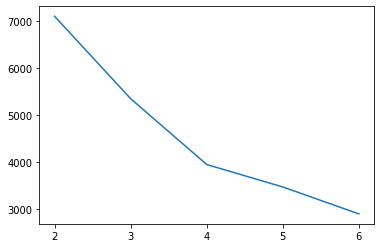

In [72]:
# Elbow Method

# Source: https://medium.com/@mayureshrpalav/clustering-customers-online-retail-dataset-516e961e7bc

import matplotlib.pyplot as plt
plt.plot(range(2,7,1), scores)
plt.xticks(ticks = range(2,7))
plt.show()

# 4 is the best

# Silhouette Score Best Cluster (6)

In [73]:
# Create model with optimal cluster of 6

kmeans = KMeans(n_clusters = 6, max_iter = 50).fit(rfm[['R_scale', 'F_scale', 'M_scale']])
clusters = kmeans.labels_


rfm['Cluster'] = clusters 
rfm


,recency,frequency,monetary,R_scale,F_scale,M_scale,concatenated_score,sum_score,customer_categories,Cluster
Customer ID,,,,,,,,,,
12346.0,164,33,372.86,1,2,2,122,5,Poor,4
12608.0,39,16,415.79,3,1,2,312,6,Fair,0
12745.0,121,22,723.85,2,2,3,223,7,Fair,4
12746.0,175,17,254.55,1,1,1,111,3,Poor,3
12747.0,4,154,5080.53,4,4,4,444,12,Excellent,2
...,...,...,...,...,...,...,...,...,...,...
18283.0,17,230,641.77,4,4,2,442,10,Good,5
18284.0,66,28,461.68,2,2,2,222,6,Fair,4
18285.0,295,12,427.00,1,1,2,112,4,Poor,3


Box Plots for Scaled Data

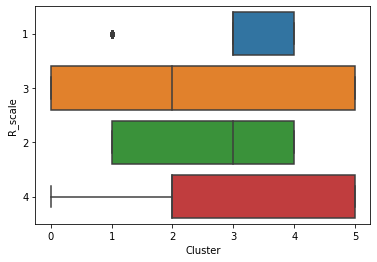

In [74]:
# Visualize clusters formed on Recency
import seaborn as sns

sns.boxplot(x='Cluster', y = 'R_scale', data = rfm)
plt.show()

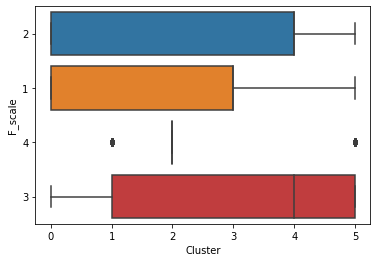

In [75]:
# Visualize clusters formed on Frequency
sns.boxplot(x='Cluster', y = 'F_scale', data = rfm)
plt.show()

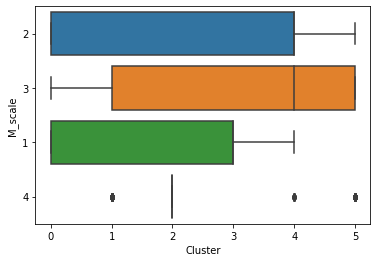

In [76]:
# Visualize clusters formed on Monetary
sns.boxplot(x='Cluster', y = 'M_scale', data = rfm)
plt.show()

Switch axis to have vertical box plots

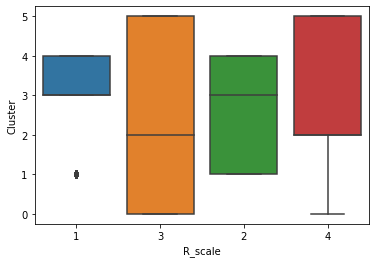

In [77]:
# Visualize clusters formed on Recency
import seaborn as sns

sns.boxplot(x = 'R_scale', y = 'Cluster', data = rfm)
plt.show()

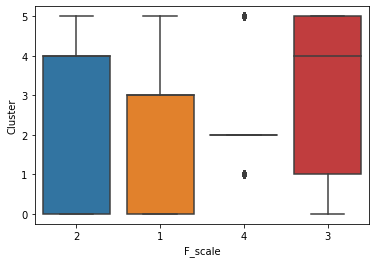

In [78]:
# Visualize clusters formed on Frequency
sns.boxplot(x= 'F_scale', y = 'Cluster', data = rfm)
plt.show()

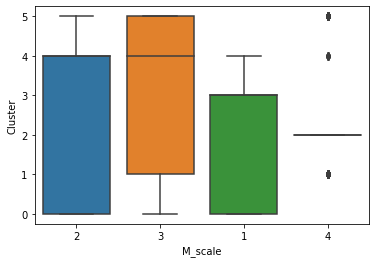

In [79]:
# Visualize clusters formed on Monetary
sns.boxplot(x= 'M_scale', y = 'Cluster', data = rfm)
plt.show()

6 Cluster Box Plots for Unscaled Data

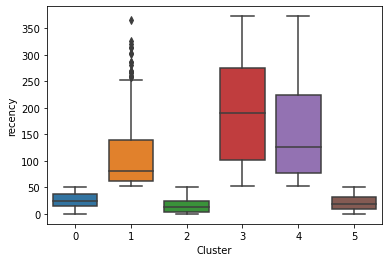

In [80]:
# Visualize clusters formed on Recency
sns.boxplot(x='Cluster', y = 'recency', data = rfm)
plt.show()

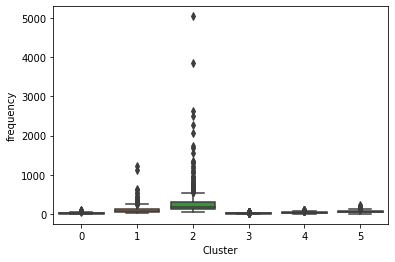

In [81]:
# Visualize clusters formed on Frequency
sns.boxplot(x='Cluster', y = 'frequency', data = rfm)
plt.show()

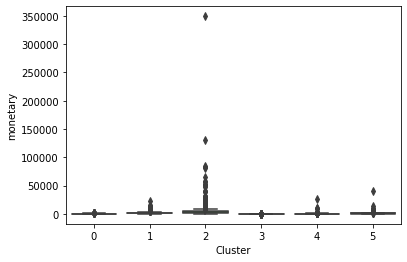

In [82]:
# Visualize clusters formed on Monetary
sns.boxplot(x='Cluster', y = 'monetary', data = rfm)
plt.show()

## 6 Cluster Bar Plots

In [83]:
df_cluster0 = rfm[rfm['Cluster'] == 0]
df_cluster1 = rfm[rfm['Cluster'] == 1]
df_cluster2 = rfm[rfm['Cluster'] == 2]
df_cluster3 = rfm[rfm['Cluster'] == 3]
df_cluster4 = rfm[rfm['Cluster'] == 4]
df_cluster5 = rfm[rfm['Cluster'] == 5]

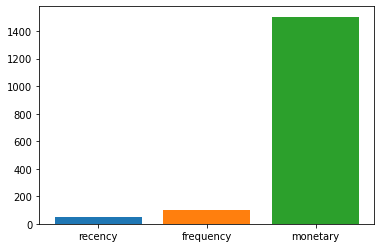

In [84]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster0['recency'])
plt.bar("frequency", df_cluster0['frequency'])
plt.bar("monetary", df_cluster0['monetary'])

plt.show()

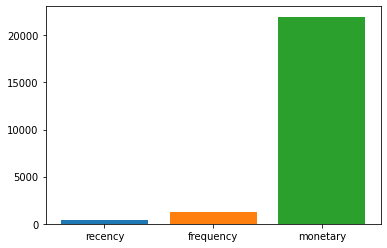

In [85]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster1['recency'])
plt.bar("frequency", df_cluster1['frequency'])
plt.bar("monetary", df_cluster1['monetary'])

plt.show()

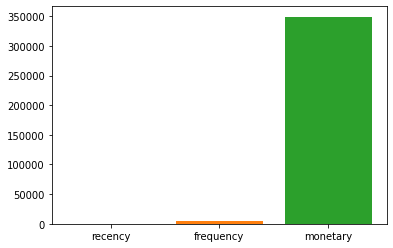

In [86]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster2['recency'])
plt.bar("frequency", df_cluster2['frequency'])
plt.bar("monetary", df_cluster2['monetary'])

plt.show()

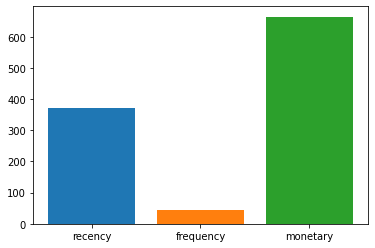

In [87]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster3['recency'])
plt.bar("frequency", df_cluster3['frequency'])
plt.bar("monetary", df_cluster3['monetary'])

plt.show()

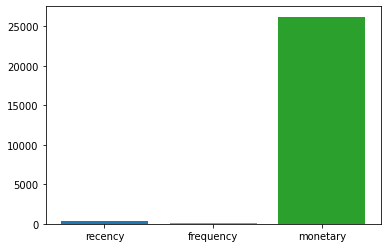

In [88]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster4['recency'])
plt.bar("frequency", df_cluster4['frequency'])
plt.bar("monetary", df_cluster4['monetary'])

plt.show()

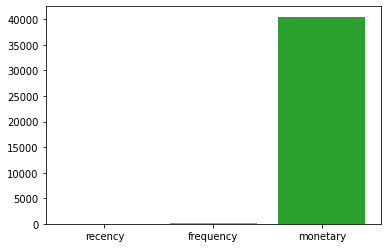

In [89]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster5['recency'])
plt.bar("frequency", df_cluster5['frequency'])
plt.bar("monetary", df_cluster5['monetary'])

plt.show()

# Other Methods Best Cluster (4)

In [90]:
# Create model with optimal cluster of 4

kmeans = KMeans(n_clusters = 4, max_iter = 50).fit(rfm[['R_scale', 'F_scale', 'M_scale']])
clusters = kmeans.labels_

rfm['Cluster'] = clusters 
rfm

,recency,frequency,monetary,R_scale,F_scale,M_scale,concatenated_score,sum_score,customer_categories,Cluster
Customer ID,,,,,,,,,,
12346.0,164,33,372.86,1,2,2,122,5,Poor,3
12608.0,39,16,415.79,3,1,2,312,6,Fair,0
12745.0,121,22,723.85,2,2,3,223,7,Fair,1
12746.0,175,17,254.55,1,1,1,111,3,Poor,3
12747.0,4,154,5080.53,4,4,4,444,12,Excellent,2
...,...,...,...,...,...,...,...,...,...,...
18283.0,17,230,641.77,4,4,2,442,10,Good,2
18284.0,66,28,461.68,2,2,2,222,6,Fair,3
18285.0,295,12,427.00,1,1,2,112,4,Poor,3


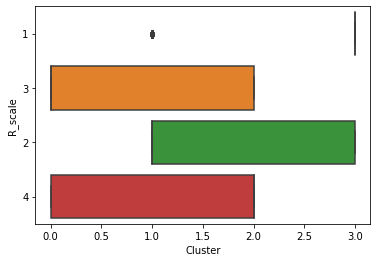

In [91]:
# Visualize clusters formed on Recency
import seaborn as sns

sns.boxplot(x='Cluster', y = 'R_scale', data = rfm)
plt.show()

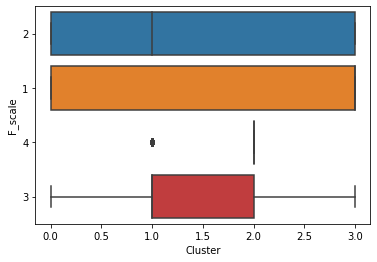

In [92]:
# Visualize clusters formed on Frequency
sns.boxplot(x='Cluster', y = 'F_scale', data = rfm)
plt.show()

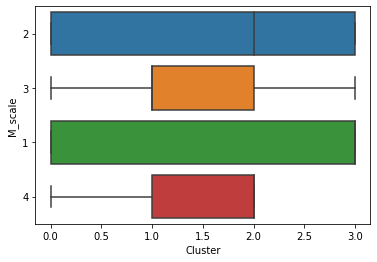

In [93]:
# Visualize clusters formed on Monetary
sns.boxplot(x='Cluster', y = 'M_scale', data = rfm)
plt.show()

Switch axis to have vertical box plots

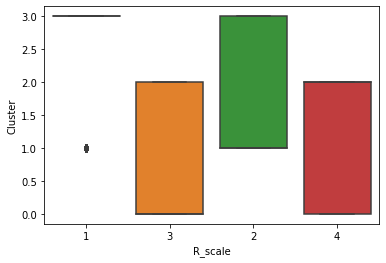

In [94]:
# Visualize clusters formed on Recency
import seaborn as sns

sns.boxplot(x = 'R_scale', y = 'Cluster', data = rfm)
plt.show()

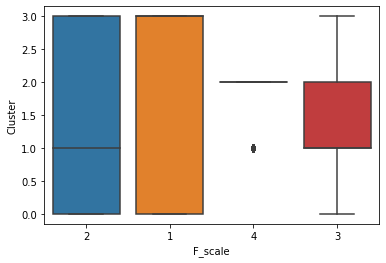

In [95]:
# Visualize clusters formed on Frequency
sns.boxplot(x= 'F_scale', y = 'Cluster', data = rfm)
plt.show()

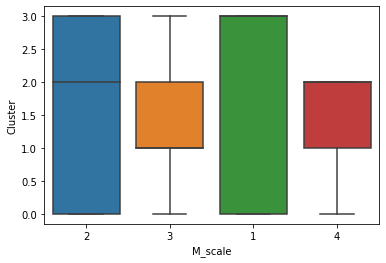

In [96]:
# Visualize clusters formed on Monetary
sns.boxplot(x= 'M_scale', y = 'Cluster', data = rfm)
plt.show()

4 Cluster Box Plots for Unscaled Data

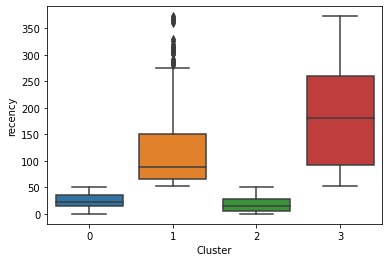

In [97]:
# Visualize clusters formed on Recency
sns.boxplot(x='Cluster', y = 'recency', data = rfm)
plt.show()

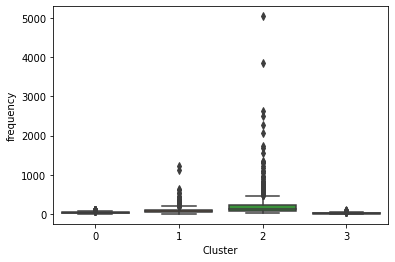

In [98]:
# Visualize clusters formed on Frequency
sns.boxplot(x='Cluster', y = 'frequency', data = rfm)
plt.show()

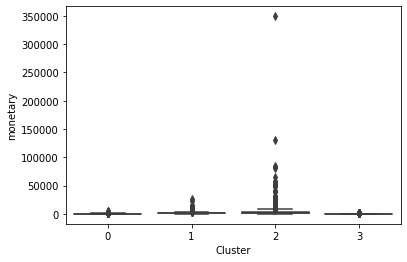

In [99]:
# Visualize clusters formed on Monetary
sns.boxplot(x='Cluster', y = 'monetary', data = rfm)
plt.show()

## 4 Cluster Bar Plots

In [100]:
df_cluster0 = rfm[rfm['Cluster'] == 0]
df_cluster1 = rfm[rfm['Cluster'] == 1]
df_cluster2 = rfm[rfm['Cluster'] == 2]
df_cluster3 = rfm[rfm['Cluster'] == 3]

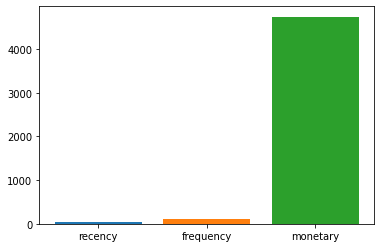

In [101]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster0['recency'])
plt.bar("frequency", df_cluster0['frequency'])
plt.bar("monetary", df_cluster0['monetary'])

plt.show()


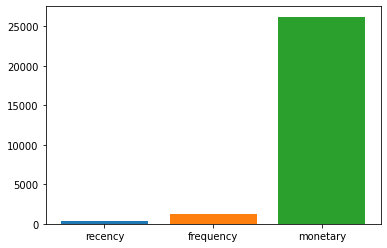

In [102]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster1['recency'])
plt.bar("frequency", df_cluster1['frequency'])
plt.bar("monetary", df_cluster1['monetary'])

plt.show()

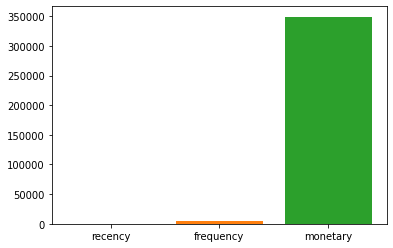

In [103]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster2['recency'])
plt.bar("frequency", df_cluster2['frequency'])
plt.bar("monetary", df_cluster2['monetary'])

plt.show()

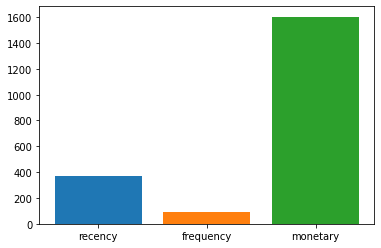

In [104]:
import matplotlib.pyplot as plt 

plt.bar("recency", df_cluster3['recency'])
plt.bar("frequency", df_cluster3['frequency'])
plt.bar("monetary", df_cluster3['monetary'])

plt.show()